## 캐글코리아 타이타닉 튜토리얼
**[링크](https://kaggle-kr.tistory.com/17?category=868316)**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) #필자가 항상 쓰는 방법.
# matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이
# graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면
# 편합니다.
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Dataset 확인

In [3]:
df_train = pd.read_csv("../input/titanic_train.csv")
df_test = pd.read_csv("../input/titanic_test.csv")

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 종속변수: Survived (생존 1, 사망 0)
- 독립변수
    - Pclass(티켓의 클래스. 1,2,3등석)
    - sex(성별. male or female)
    - Age(나이. int)
    - sibSp(함께 탑승한 형제 or 배우자 수, int)
    - parch(함께 탑승한 부모 or 아이의 수, int)
    - ticket(티켓 번호, alphabet + int)
    - fare(운임, float)
    - cabin(객실 번호, alphabet + int)
    - Embarked(탑승 항구, C = Cherbourg, Q = Queenstown, S = Southampton)
- 이 중에서 feature -> Pclass, Age, SibSp, Parch, Fare

In [8]:
# 각 feature가 가진 통계치. feature 중 Age만 714개 -> null이 있음
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1.1 Null data check

In [18]:
# format -> {:>10} 용법 알고 가기!!
for col in df_train.columns:
    msg = "column: {:>10}\t Percent of NaN value: {:.2f}%".format(
    col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [20]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
    col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


- train, test 둘 다 Age, Cabin(객실 번호)가 null
- train에선 Embarekd(탑승 항구) 중 0.22%가 null

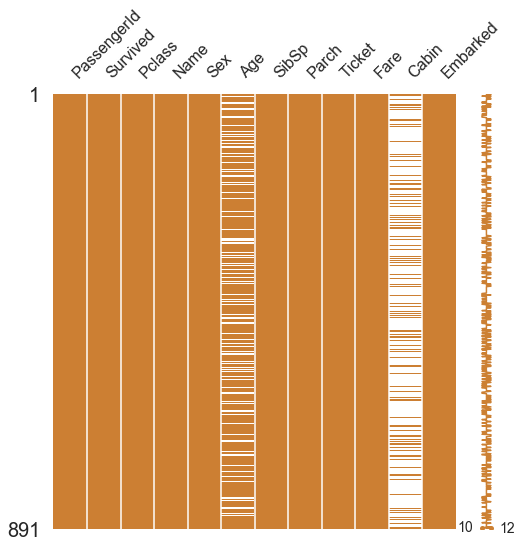

In [23]:
# msno 라이브러리 -> null data의 존재를 더 쉽게 볼 수 있음
# 여기서 color 값들은 RGB.
# 각 row에서 null 여부를 보기
msno.matrix(df=df_train, figsize=(8, 8), color=(0.8, 0.5, 0.2))

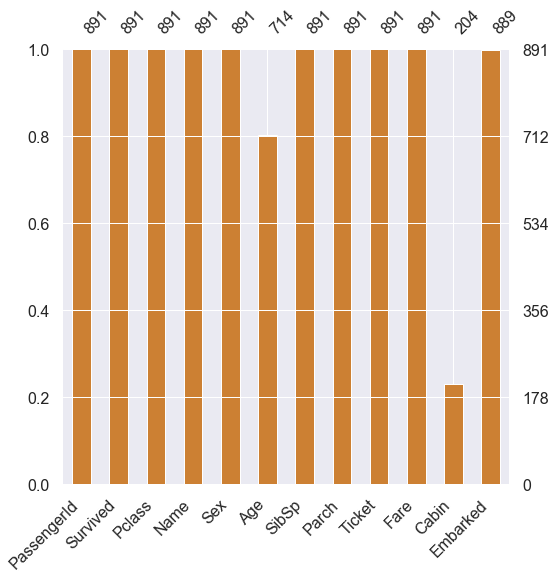

In [26]:
# null 아닌 비율과 숫자 보기
msno.bar(df=df_train, figsize=(8, 8), color=(0.8, 0.5, 0.2))

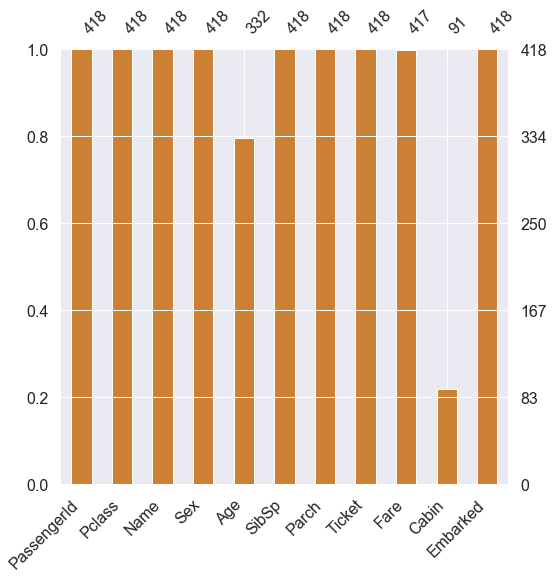

In [28]:
msno.bar(df=df_test, figsize=(8, 8), color=(0.8, 0.5, 0.2))

### 1.2 Target label 확인
- target label(survived)이 어떤 분포를 가지고 있는지 확인해야 함
- 지금 같은 binary classification 문제에서, 1과 0의 분포에 따라 모델의 평가 방법이 달라질 수 있음

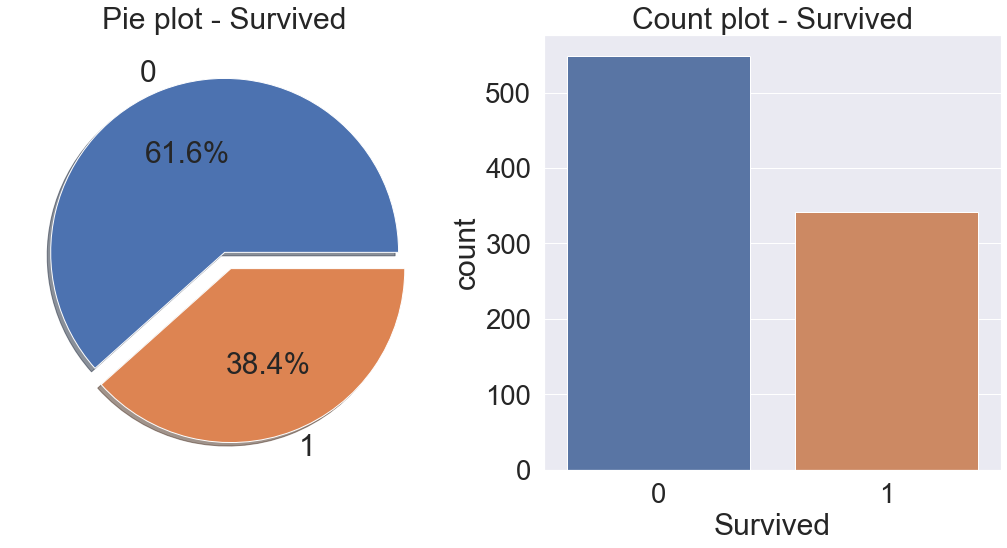

In [37]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 1. pie plot
df_train['Survived'].value_counts().plot.pie(
explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, fontsize=30)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
# 2. count plot
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- target label의 분포가 제법 균일(balanced)함. 62% vs 38%
- 불균일한 경우, ex: 1이 99%인 경우 모두 1로 예측해도 정확도가 99%가 됨.
- 지금은 그렇지 않으니 계속함

## 2. EDA
### 2.1 Pclass(티켓 클래스. 1,2,3등석)
- 카테고리이면서, 순서가 있음
- Pclass에 따른 생존률의 차이 -> groupby나 pivot 메소드 사용

In [42]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [43]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()
# Pclass 1의 경우, 216명 중 총 합(136)이 생존자 수가 됨

,Survived
Pclass,
1,136
2,87
3,119


In [48]:
#좀더 수월하게 보기 -> pd.crosstab : 이걸 컬러로 보기
pd.crosstab(df_train['Pclass'], df_train['Survived'], 
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


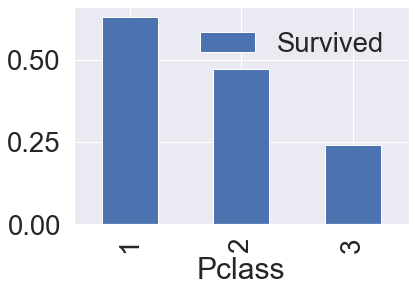

In [51]:
# Pclass별 그룹별 생존율을 생존률 내림차순으로 보기
df_train[['Pclass', 'Survived']].groupby(['Pclass'],
as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

1번 클래스가 생존률이 높음